In [ ]:
import cv2 as cv
import json
from flask import Flask, request, render_template, jsonify
from flask import Flask, request, jsonify, render_template
from ultralytics import YOLO

In [ ]:
model = YOLO()

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="xmEvO8BzBQx8xt3a30Hf")
project = rf.workspace("internship-j2trp").project("weight-tjd68")
version = project.version(4)
dataset = version.download("yolov11")

# Dataset

In [6]:
train_dir = "/kaggle/working/Weight-4/train"

Found 337 images belonging to 2 classes.


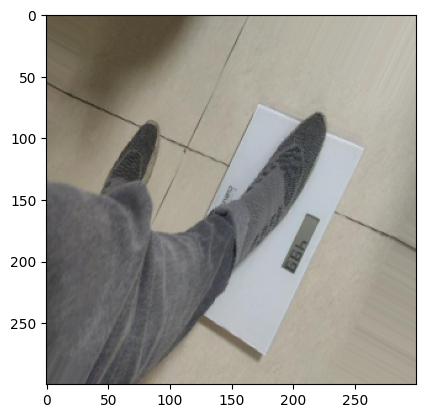

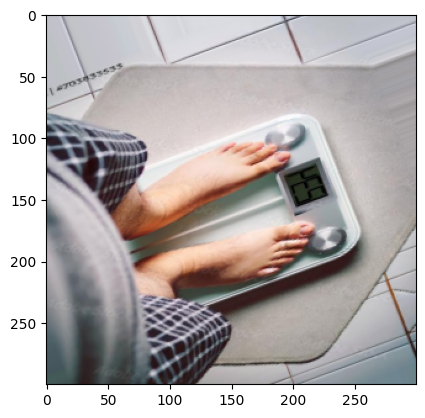

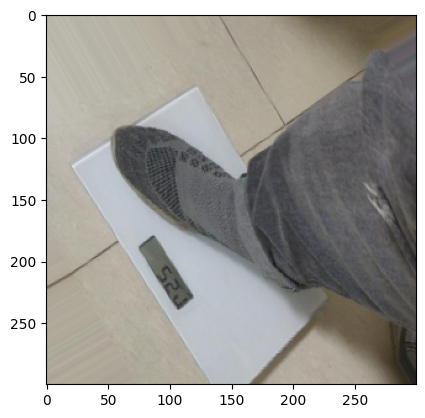

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

sample_generator = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=90,
    height_shift_range=0.1,
    width_shift_range=0.1,
    zoom_range=0.15
)


sample_images = sample_generator.flow_from_directory(
    train_dir,
    target_size=(300, 300),
    color_mode='rgb',
    class_mode=None,
    batch_size=1,
    shuffle=True,
    seed=42
)


import matplotlib.pyplot as plt

for i in range(3):
    img = next(sample_images)[0]
    plt.imshow(img)
    plt.show()

In [8]:
import yaml

yaml_path = '/kaggle/working/Weight-4/data.yaml'

with open(yaml_path, 'r') as file:
    data_yaml = yaml.safe_load(file)
    print(data_yaml)

{'train': '../train/images', 'val': '../valid/images', 'test': '../test/images', 'nc': 1, 'names': ['number'], 'roboflow': {'workspace': 'internship-j2trp', 'project': 'weight-tjd68', 'version': 4, 'license': 'CC BY 4.0', 'url': 'https://universe.roboflow.com/internship-j2trp/weight-tjd68/dataset/4'}}


# Modelling

### Model for object detection (Digital Weight Scale Detection)

In [ ]:
model = YOLO

In [ ]:
model.train(this_is_model)


In [11]:
model = YOLO

In [ ]:
result = model.predict(source="/kaggle/input/tes-data/uploaded_image.jpg")

In [13]:
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="xmEvO8BzBQx8xt3a30Hf")
project = rf.workspace("mattia-dolce-rcg61").project("7segmentrecognition_v3")
version = project.version(7)
dataset = version.download("yolov11")
                

### Model for Digital Digit Scale Detection

In [ ]:
model2 = YOLO

In [ ]:
import yaml

# Path ke file data.yaml
yaml_path = '/kaggle/working/7SegmentRecognition_v3-7/data.yaml'

# Membaca dan menampilkan isi file YAML
with open(yaml_path, 'r') as file:
    data_yaml = yaml.safe_load(file)
    print(data_yaml)

In [ ]:
model2.train(this_is_model)

# Test to User Experience

In [ ]:
result = model.predict(source="/kaggle/input/tes-data/uploaded_image.jpg")
result[0].show()

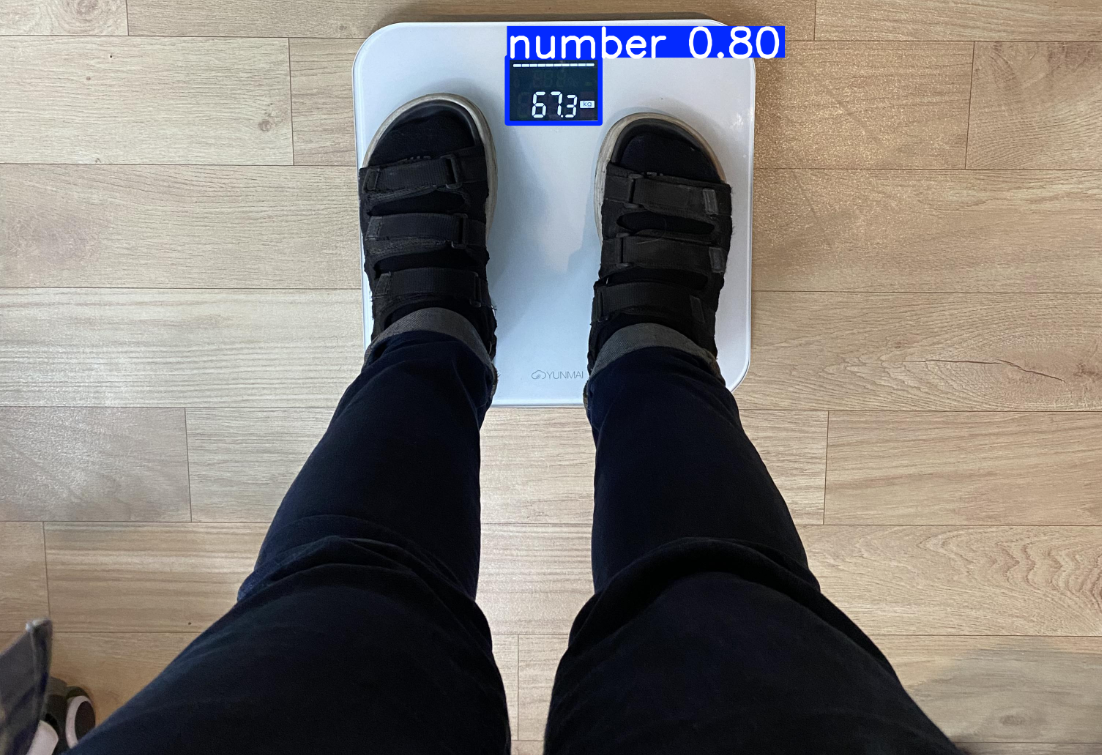

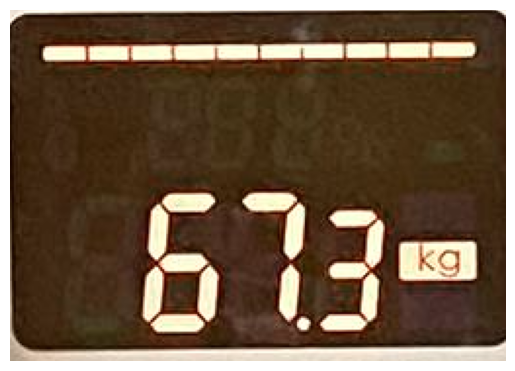

In [38]:
import matplotlib.pyplot as plt

image = result[0].orig_img

x_min, y_min, x_max, y_max = result[0].boxes.xyxy[0].cpu().numpy()

cropped_image = image[int(y_min):int(y_max), int(x_min):int(x_max)]

final_cropped_image = Image.fromarray(cropped_image)

plt.imshow(cropped_image)
plt.axis("off")
plt.show()


0: 480x640 2 .s, 1 3, 1 6, 1 7, 11.7ms
Speed: 2.7ms preprocess, 11.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


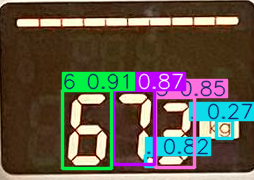

In [39]:
result2 = model2.predict(source=final_cropped_image)
result2[0].show()

In [40]:
class_ids = result2[0].boxes.cls.tolist()
class_names = [result2[0].names[int(cls_id)] for cls_id in class_ids]

print(class_names)

['6', '7', '3', '.', '.']


In [41]:
detections = []
for box, cls_id, conf in zip(result2[0].boxes.xyxy, result2[0].boxes.cls, result2[0].boxes.conf):
    if conf >= 0.75:
        x_min = box[0].item()
        class_name = result2[0].names[int(cls_id)]
        detections.append((x_min, class_name))

sorted_detections = sorted(detections, key=lambda x: x[0])

final_value = ''.join([name for _, name in sorted_detections])
print(final_value)

67.3
